In [76]:
!Rscript ./create_synthetic_dataset.r

Error in library(tidyverse) : there is no package called ‘tidyverse’
Execution halted


In [ ]:
import pandas as pd
import numpy as np

df_counts = pd.read_csv("../data/sd_counts.csv", index_col=0)
df_cell_info = pd.read_csv("../data/sd_cell_info.csv", index_col=0)
df_feature_info = pd.read_csv("../data/sd_feature_info.csv", index_col=0)
df_expression_patterns= pd.read_csv("../data/sd_expression_patterns.csv", index_col=0)
df_feature_network = pd.read_csv("../data/sd_feature_network.csv", index_col=0)

In [ ]:
df_cell_info.head()

,simulation_i,sim_time
1,1,-144.000000
2,1,-141.916667
3,1,-140.000000
4,1,-137.916667
5,1,-135.916667


In [2]:
from_state = df_expression_patterns["from"]
to_state = df_expression_patterns["to"]

state_labels = pd.unique(pd.concat([from_state, to_state]))
num_states = state_labels.size
state_trajectory = pd.DataFrame(
    np.zeros((num_states, num_states), dtype=np.int8),
    index=state_labels, 
    columns=state_labels
) 

for from_, to_ in zip(from_state, to_state):
    state_trajectory.loc[from_, to_] = 1 

display(state_trajectory)

,sBurn,sA,sB,sBmid,sC,sD,sEndC,sEndD
sBurn,0,1,0,0,0,0,0,0
sA,0,0,1,0,0,0,0,0
sB,0,0,0,1,0,0,0,0
sBmid,0,0,0,0,1,1,0,0
sC,0,0,0,0,0,0,1,0
sD,0,0,0,0,0,0,0,1
sEndC,0,0,0,0,0,0,0,0
sEndD,0,0,0,0,0,0,0,0


In [3]:
df_expression_patterns

,from,to,module_progression,start,burn,time
1,sBurn,sA,"+Burn1,+Burn2,+Burn3,+Burn4,+B4,+B5",True,True,120
2,sA,sB,"+A1,+A2,+A3,+A4,+A5,+A6",False,False,180
3,sB,sBmid,"+B1,+B4,+B5",False,False,40
4,sBmid,sC,"+B2,+B6,+B8,+B9,+B10,+B11",False,False,120
5,sBmid,sD,"+B3,+B7,+B8,+B12,+B13,+B14",False,False,120
6,sC,sEndC,"+C1,+C2,+C3,+C4,+C5,+C6",False,False,179
7,sD,sEndD,"+D1,+D2,+D3,+D4",False,False,119


In [4]:
import re

def parse_modules(module_progression: str):
    return re.findall(r"[+-]([a-zA-Z0-9]+)\,?", module_progression) 

transition_modules = {
    f"{row['from']}-{row['to']}": parse_modules(row["module_progression"]) 
    for _, row in df_expression_patterns.iterrows()
}
print(transition_modules)

{'sBurn-sA': ['Burn1', 'Burn2', 'Burn3', 'Burn4', 'B4', 'B5'], 'sA-sB': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6'], 'sB-sBmid': ['B1', 'B4', 'B5'], 'sBmid-sC': ['B2', 'B6', 'B8', 'B9', 'B10', 'B11'], 'sBmid-sD': ['B3', 'B7', 'B8', 'B12', 'B13', 'B14'], 'sC-sEndC': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], 'sD-sEndD': ['D1', 'D2', 'D3', 'D4']}


In [5]:
tf_mask = df_feature_info["is_tf"]
driver_genes = df_feature_info[tf_mask]
display(driver_genes.head())

target_mask = ~df_feature_info["is_tf"] & ~df_feature_info["is_hk"] 
target_genes = df_feature_info[target_mask]
display(target_genes.head())

,feature_id,module_id,basal,burn,independence,color,is_tf,is_hk,transcription_rate,splicing_rate,...,mrna_halflife,protein_halflife,mrna_decay_rate,protein_decay_rate,max_premrna,max_mrna,max_protein,mol_premrna,mol_mrna,mol_protein
1,Burn1_TF1,Burn1,1.0,True,1.0,#FF9999,True,False,15.078484,0.346574,...,3.745472,5.505012,0.185063,0.125912,28.362406,53.115298,45057.880234,mol_premrna_Burn1_TF1,mol_mrna_Burn1_TF1,mol_protein_Burn1_TF1
2,Burn2_TF1,Burn2,0.0,True,1.0,#FF6666,True,False,15.809626,0.346574,...,4.458086,7.187736,0.155481,0.096435,31.489862,70.192262,98879.942545,mol_premrna_Burn2_TF1,mol_mrna_Burn2_TF1,mol_protein_Burn2_TF1
3,Burn3_TF1,Burn3,0.0,True,1.0,#FF3333,True,False,10.103373,0.346574,...,2.700786,7.864742,0.256646,0.088133,16.749066,22.617822,25949.141879,mol_premrna_Burn3_TF1,mol_mrna_Burn3_TF1,mol_protein_Burn3_TF1
4,Burn4_TF1,Burn4,0.0,True,1.0,#FF0000,True,False,17.580155,0.346574,...,4.765104,8.321074,0.145463,0.083300,35.729354,85.127047,148073.563300,mol_premrna_Burn4_TF1,mol_mrna_Burn4_TF1,mol_protein_Burn4_TF1
5,A1_TF1,A1,0.0,False,1.0,#EBFF99,True,False,14.005805,0.346574,...,4.397151,9.036121,0.157636,0.076708,27.777770,61.071521,112184.088676,mol_premrna_A1_TF1,mol_mrna_A1_TF1,mol_protein_A1_TF1


,feature_id,module_id,basal,burn,independence,color,is_tf,is_hk,transcription_rate,splicing_rate,...,mrna_halflife,protein_halflife,mrna_decay_rate,protein_decay_rate,max_premrna,max_mrna,max_protein,mol_premrna,mol_mrna,mol_protein
36,Target1,NaN,0.0001,True,1.0,NaN,False,False,19.016940,0.346574,...,4.301555,7.401595,0.161139,0.093648,37.456133,80.559812,118614.039031,mol_premrna_Target1,mol_mrna_Target1,mol_protein_Target1
37,Target2,NaN,0.0001,True,1.0,NaN,False,False,17.584913,0.346574,...,4.764012,7.862192,0.145497,0.088162,35.736602,85.124804,105154.998974,mol_premrna_Target2,mol_mrna_Target2,mol_protein_Target2
38,Target3,NaN,0.0001,True,1.0,NaN,False,False,13.659622,0.346574,...,3.494387,6.808033,0.198360,0.101813,25.066573,43.796154,46961.466714,mol_premrna_Target3,mol_mrna_Target3,mol_protein_Target3
39,Target4,NaN,0.0001,True,1.0,NaN,False,False,14.543400,0.346574,...,4.076601,5.997727,0.170031,0.115568,28.151917,57.382066,69694.917324,mol_premrna_Target4,mol_mrna_Target4,mol_protein_Target4
40,Target5,NaN,0.5000,True,1.0,NaN,False,False,12.593651,0.346574,...,2.907140,6.960513,0.238429,0.099583,21.527506,31.291740,39446.123663,mol_premrna_Target5,mol_mrna_Target5,mol_protein_Target5


In [6]:
transition_grns = {}
feature_ids = df_feature_info["feature_id"]

for transition, modules in transition_modules.items():
    active_gene_mask = df_feature_info["module_id"].isin(modules)
    active_gene_labels = feature_ids[active_gene_mask]
    active_relations = df_feature_network[df_feature_network["from"].isin(active_gene_labels)]
    transition_grn = pd.DataFrame(
        np.zeros((feature_ids.size, feature_ids.size)),
        index=feature_ids, 
        columns=feature_ids, 
    )
    for _, row in active_relations.iterrows():
        transition_grn.loc[row["from"], row["to"]] = row["effect"] * row["strength"]

    transition_grns[transition] = transition_grn
display(transition_grns["sA-sB"].head())

feature_id,Burn1_TF1,Burn2_TF1,Burn3_TF1,Burn4_TF1,A1_TF1,A2_TF1,A3_TF1,A4_TF1,A5_TF1,A6_TF1,...,HK41,HK42,HK43,HK44,HK45,HK46,HK47,HK48,HK49,HK50
feature_id,,,,,,,,,,,,,,,,,,,,,
Burn1_TF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Burn2_TF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Burn3_TF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Burn4_TF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1_TF1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
gene_columns = [ col for col in df_counts.columns if "premrna" not in col and "protein" not in col]
df_counts_genes = df_counts[gene_columns]

prefix = "mol_mrna_"
prefix_length = len(prefix)
df_counts_genes = df_counts_genes.rename(columns={ col: col[prefix_length:] for col in gene_columns })

display(df_counts_genes)

,Burn1_TF1,Burn2_TF1,Burn3_TF1,Burn4_TF1,A1_TF1,A2_TF1,A3_TF1,A4_TF1,A5_TF1,A6_TF1,...,HK41,HK42,HK43,HK44,HK45,HK46,HK47,HK48,HK49,HK50
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,9,0,0,0,0,0,0,0,0
3,20,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,0,0,0,0,0
4,29,1,0,0,0,0,0,0,0,0,...,0,36,0,0,0,0,0,0,0,0
5,35,2,0,0,0,0,0,0,0,0,...,0,39,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,49,52,16,59,32,23,34,49,58,16,...,0,80,0,0,0,0,0,0,0,0
5737,52,50,14,57,33,24,33,40,61,20,...,0,80,0,0,0,0,0,0,0,0
5738,43,46,19,57,35,26,32,45,68,16,...,0,74,0,0,0,0,0,0,0,0
5739,41,59,14,60,31,28,35,45,70,16,...,0,83,0,0,0,0,0,0,0,0


In [ ]:
import anndata

adata = anndata.AnnData(X=df_counts_genes, varp=transition_grns, uns={ "state_trajectory": state_trajectory })
adata

/home/atr0x/Documents/UNI/WS2025/BachelorArbeit/GAE-gene-interactions/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 5740 × 135

In [12]:
import scanpy as sc

sc.pp.recipe_zheng17(adata, n_top_genes=100)

/home/atr0x/Documents/UNI/WS2025/BachelorArbeit/GAE-gene-interactions/.venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/home/atr0x/Documents/UNI/WS2025/BachelorArbeit/GAE-gene-interactions/.venv/lib/python3.12/site-packages/scanpy/preprocessing/_recipes.py:187: FutureWarning: Use sc.pp.highly_variable_genes instead
  filter_result = filter_genes_dispersion(
/home/atr0x/Documents/UNI/WS2025/BachelorArbeit/GAE-gene-interactions/.venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


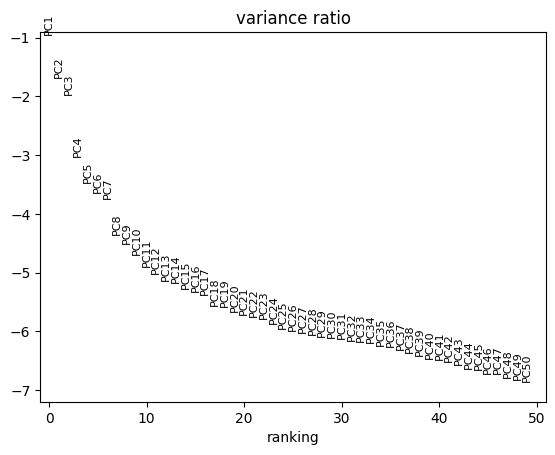

In [13]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [67]:
n_pcs = 20 
sc.pp.neighbors(adata, n_pcs=n_pcs)
sc.tl.umap(adata)

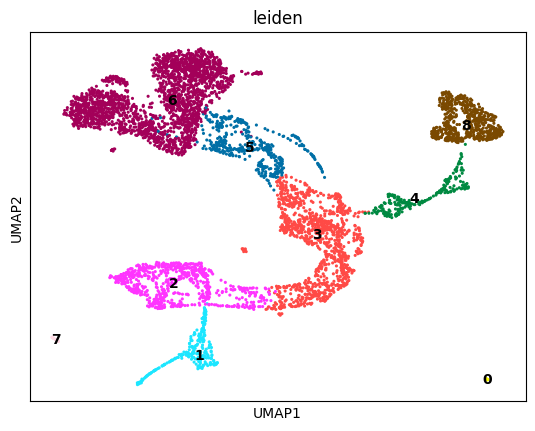

In [68]:
sc.tl.leiden(adata, resolution=0.1, flavor="igraph")
sc.pl.umap(
    adata,
    color="leiden",
    size=20,
    legend_loc="on data"
)

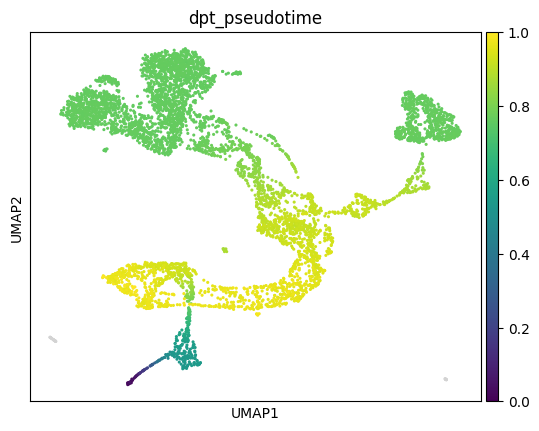

In [69]:
adata.uns["iroot"] = 1 # I do not know the root, but probably some of the first cells.
sc.tl.diffmap(adata)
sc.tl.dpt(adata, n_branchings=2)
sc.pl.umap(
    adata,
    color="dpt_pseudotime",
    size=20
)

Ok, from the simulation we actually do not get any information, about what cells are in which groups. So we have to deduce this somehow by ourselfs. The clustering works anyways quite good. I think I can map sA, sB, sBmid, sC, sD, sEndC, sEndD on it. However which of the branches is sC and which sD?

Also I do not know what is going on with clusters 0 and 7. Simulated knockout or dropout maybe?
